In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
c_names='CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV'.split(',')

##### 從load_boston 中的 DESCR 找到"
##### This is a copy of UCI ML housing dataset.
##### https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ 
##### "

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",names = c_names)

In [4]:
df.loc[1,"CRIM"].split()

['0.02731',
 '0.00',
 '7.070',
 '0',
 '0.4690',
 '6.4210',
 '78.90',
 '4.9671',
 '2',
 '242.0',
 '17.80',
 '396.90',
 '9.14',
 '21.60']

In [5]:
df2 = pd.DataFrame(columns=c_names)
for i in range(len(df)):
    l1 = df.loc[i,"CRIM"].split()
    l1 = np.array(l1)
    df3 = pd.DataFrame(l1.reshape(1,14),columns=c_names)
    df2 = pd.concat([df2,df3], axis=0)

In [6]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
0,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
0,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
0,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


#### drop掉ZN,MEDV,CHAS

In [7]:
df2.drop(['ZN','MEDV','CHAS'], axis =1,inplace = True)

In [8]:
df2.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.310,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98
0,0.02731,7.070,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14
0,0.02729,7.070,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03
0,0.03237,2.180,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94
0,0.06905,2.180,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33


#### 把數據取出來

In [9]:
X=[]
for i in range(len(df2)):
    for j in range(11):
        X=X+[df2.iloc[i,j]]

In [10]:
X=np.array(X)
X=X.reshape(len(df2),11)

#### 機器學習

In [11]:
model = LinearRegression()

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()

In [13]:
Y = boston.target

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [15]:
x_train = x_train.astype(np.float64)
y_train = y_train.astype(np.float64)

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
x_test = x_test.astype(np.float64)

y_predict = model.predict(x_test)

Text(0, 0.5, 'predict price')

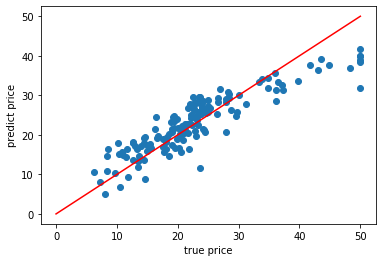

In [18]:
plt.scatter(y_test,y_predict);
plt.plot([0,50],[0,50],'r');
plt.xlabel('true price')
plt.ylabel('predict price')

### 對比原本的:

In [21]:
X2= boston.data
Y2= boston.target
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1)

In [22]:
x2_train = x2_train.astype(np.float64)
y2_train = y2_train.astype(np.float64)

model.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
x2_test = x2_test.astype(np.float64)

y2_predict = model.predict(x2_test)

Text(0, 0.5, 'predict price')

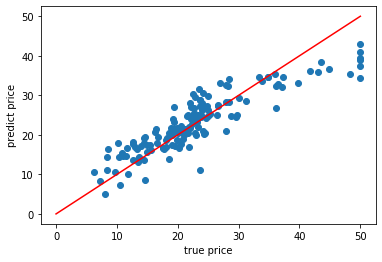

In [35]:
plt.scatter(y2_test,y2_predict);
plt.plot([0,50],[0,50],'r');
plt.xlabel('true price')
plt.ylabel('predict price')

Text(0, 0.5, 'predict price')

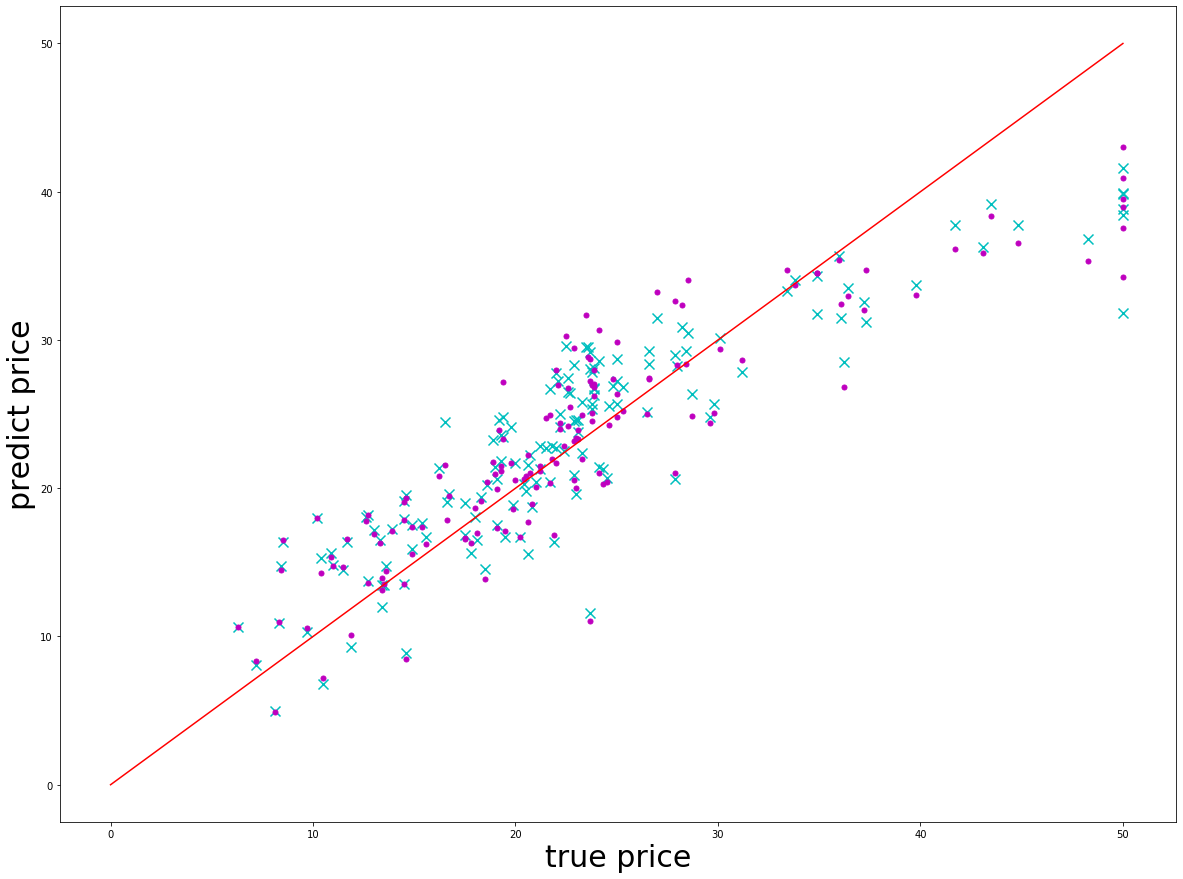

In [58]:
plt.figure(figsize=(20,15))
plt.scatter(y_test,y_predict,marker='x',c='c',s=100);
plt.scatter(y2_test,y2_predict,marker='.',c='m',s=100);
plt.plot([0,50],[0,50],'r');
plt.xlabel('true price',fontsize=30)
plt.ylabel('predict price',fontsize=30)

## 藍色x是所有feature
## 紫色●是去掉ZN,MEDV,CHAS